In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import itertools
import scipy.spatial.distance as dist
import datetime
import scipy.stats as stats
import sklearn.metrics as skm

import sys
import h5py
sys.path.append('/Users/johnmarshall/Documents/MATLAB/CNMF_E_jjm/python_wrapper/')
sys.path.append('/Users/johnmarshall/caiman_data/post_cnmfe_analysis')
import miniscope_analysis as ma 
import python_utils_jjm as utils_jjm
import jjm_post_cnmfe_fns as jjm
import align_msCam_tobehavior as align_tracking

In [3]:
folder_path = '/Users/johnmarshall/Documents/Analysis/MiniscopeMovies/OpenFieldAnalysis/'

wt_analysis = ['GRIN026_full_session_analysis.h5', 'GRIN013_full_session_analysis.h5', 'GRIN027_full_session_analysis.h5']
ko_analysis = ['GRIN011_full_session_analysis.h5', 'GRIN012_full_session_analysis.h5', 'GRIN018full_session_analysis.h5']

In [4]:
# load and concactenate ISIs distributions & plot
wt_results = []
for session_file in wt_analysis:
    wt_results.append(h5py.File(folder_path+session_file, 'r'))

In [5]:
# load and concactenate ISIs distributions & plot
ko_results = []
for session_file in ko_analysis:
    ko_results.append(h5py.File(folder_path+session_file, 'r'))

In [6]:
wt_ISIs = np.hstack([wt_results[0]['ISI_distribution'], wt_results[1]['ISI_distribution'], wt_results[2]['ISI_distribution']])

In [7]:
ko_ISIs = np.hstack([ko_results[0]['ISI_distribution'], ko_results[1]['ISI_distribution'], ko_results[2]['ISI_distribution']])

In [8]:
np.mean(wt_ISIs)

48.39569795427196

In [9]:
np.mean(ko_ISIs)

35.214159038901606

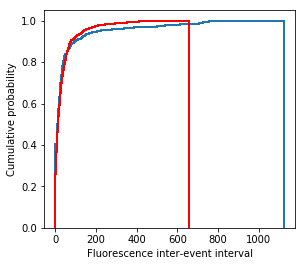

In [33]:
fig, ax = plt.subplots(figsize=(4.5, 4))
n, bins, patches = ax.hist(wt_ISIs, bins='auto', density=True, histtype='step',
                           cumulative=True, label='Empirical', linewidth=2)
n, bins, patches = ax.hist(ko_ISIs, bins='auto', density=True, histtype='step',
                           cumulative=True, label='Empirical', linewidth=2, color='r')
plt.ylabel('Cumulative probability')
plt.xlabel('Fluorescence inter-event interval')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/SFN/scope_ISIs.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/SFN/scope_ISIs.svg', transparent=True, format="svg")

In [22]:
# same for jaacard index
wt_jaccard_scores = np.hstack([wt_results[0]['jaccard_scores'], wt_results[1]['jaccard_scores'], wt_results[2]['jaccard_scores']])

In [23]:
ko_jaccard_scores = np.hstack([ko_results[0]['jaccard_scores'], ko_results[1]['jaccard_scores'], ko_results[2]['jaccard_scores']])

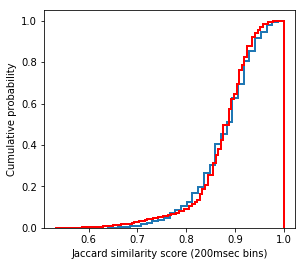

In [34]:
fig, ax = plt.subplots(figsize=(4.5, 4))
n, bins, patches = ax.hist(wt_jaccard_scores, bins='auto', density=True, histtype='step',
                           cumulative=True, label='Empirical', linewidth=2)
n, bins, patches = ax.hist(ko_jaccard_scores, bins='auto', density=True, histtype='step',
                           cumulative=True, label='Empirical', linewidth=2, color='r')
plt.ylabel('Cumulative probability')
plt.xlabel('Jaccard similarity score (200msec bins)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/SFN/scope_similarity.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/SFN/scope_similarity.svg', transparent=True, format="svg")